In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parameter
N = 4                 # Number of CSTRs
c_in = 0.0            # Inlet 1st Reactor [mol/L]
tau_total = 10.0      # Total residence time [min]
tau = tau_total / N   # Residence time each reactor
t_span = (0, 20)      # Simulation time span [min]
t_eval = np.linspace(*t_span, 300)
c0 = np.zeros(N)      # Initial concentration in all reactors.
c0[0] = 1

# Differential Calculus (Component Balance) 
def cstr_cascade(t, c):
    dc_dt = np.zeros(N)                           # Creation of the list for python
    dc_dt[0] = (c_in - c[0]) / tau                # Component blanace for the first reactor
    for i in range(1, N):                         # Iteration for the rest of the reactors
        dc_dt[i] = (c[i-1] - c[i]) / tau          # Component balance for the other reactors
    return dc_dt

# Calculate solution
solution = solve_ivp(cstr_cascade, t_span, c0, t_eval=t_eval)

# Plotting
plt.figure(figsize=(10, 6)) 
for i in range(N):
    plt.plot(solution.t, solution.y[i], label=f'CSTR {i+1}')
plt.axhline(c_in, color='gray', linestyle='--', label='$c_{in}$')
plt.xlabel('Time [min]')
plt.ylabel('Concentration [mol/L]')
plt.title(f'CSTR Cascade Response (N = {N})')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

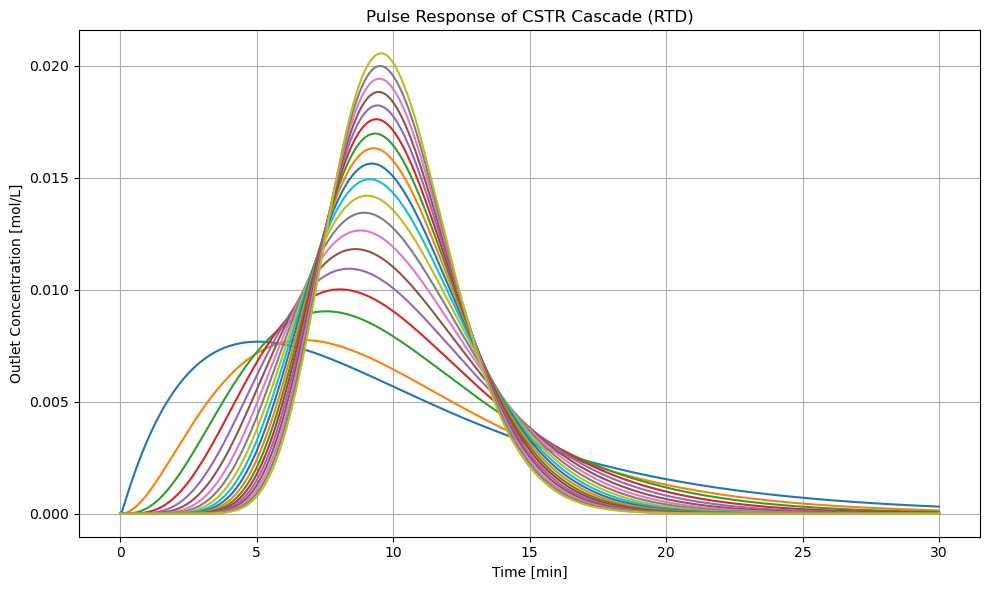

In [6]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parameter
N_total = 20                                         # Number of CSTRs
N_values = list(range(2, N_total + 1))               
tau_total = 10.0                                     # Total Residence Time [min]
t_span = (0, 30)                                     # Time Span [min]
t_eval = np.linspace(*t_span, 500)

# Pulse at the input: Dirac-like
def pulse_input(t):
    return 1.0 if t < 0.1 else 0.0  # short pulse Impuls

# Simulation for different number of CSTRs
plt.figure(figsize=(10, 6))
for N in N_values:
    tau = tau_total / N                              # Residence Time for the respective CSTR changes by the number of CSTRs
    c0 = np.zeros(N)                                 # Initial concentration = 0 in each reactor

    def cascade_ode(t, c):
        dc_dt = np.zeros(N)
        dc_dt[0] = (pulse_input(t) - c[0]) / tau     # Component balance for the first reactor
        for i in range(1, N):                        # Iteration for the rest of the reactors
            dc_dt[i] = (c[i-1] - c[i]) / tau         # Component balance for the other reactors
        return dc_dt

    sol = solve_ivp(cascade_ode, t_span, c0, t_eval=t_eval)  # Solves the differential calculus
    plt.plot(sol.t, ol.y[-1], label=f'N = {N}')             # Plots the result

# Plot konfigurieren
plt.xlabel('Time [min]')
plt.ylabel('Outlet Concentration [mol/L]')
plt.title('Pulse Response of CSTR Cascade (RTD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()